In [105]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [102]:
# Left and right columns are initial and final distances for each iteration
d = np.load('data/k4_tol7/n8_m12.npy')
d.shape, d[0:6]

((100, 2),
 array([[0.41234574, 0.25569809],
        [0.43169156, 0.30924728],
        [0.28963592, 0.24397238],
        [0.30086347, 0.21045501],
        [0.36791767, 0.28554612],
        [0.3173356 , 0.17259127]]))

In [103]:
pl,nl = [],[]
#Lists of positive and negative starting and final distances

dnm = np.load('data/k4_tol7/n7_m5.npy')
diff = dnm[:,0] - dnm[:,1]
for i in range(100):
    if diff[i] > 0: pl.append(dnm[i])
    else: nl.append(dnm[i])
        
print('Positive means: ',np.mean(np.array(pl), axis=0))
print('Negative means: ',np.mean(np.array(nl), axis=0))

Positive means:  [0.0847342 0.0573891]
Negative means:  [0.06152977 0.09123245]


In [100]:
#M and N computed with tol=1e-5. All the rest used tol=1e-7

tol5mn = np.array([[10,9],[10,10],[10,11],[10,12],[11,6],[11,7],[11,8],[11,9],[11,10],[11,11],[11,12],[12,6],[12,7],[12,8],[12,9],[12,10],[12,11],[12,12]])
yind = tol5mn[:,0] - 5
xind = tol5mn[:,1] - 5

In [80]:
neg,avs,avf,ri = np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8))
for m in range(8):
    for n in range(8):
        dnm = np.load('data/k4_tol7/n' + str(n+5) + '_m' + str(m+5) + '.npy')
        #if np.any(dnm<0): print(n,m)
        diff = dnm[:,0] - dnm[:,1]
        neg[m,n] = np.sum(diff<0)
        avs[m,n] = np.mean(dnm[:,0])
        avf[m,n] = np.mean(dnm[:,1])
        ri[m,n] = (avs[m,n] - avf[m,n]) / avs[m,n]

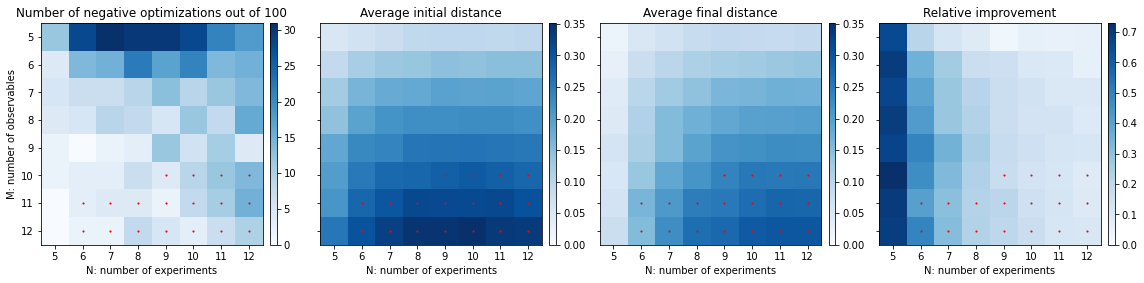

In [104]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)

im0 = ax[0].imshow(neg, cmap='Blues', vmin=0, vmax=np.max(arr))
ax[0].set_title('Number of negative optimizations out of 100')
im1 = ax[1].imshow(avs, cmap='Blues', vmin=0, vmax=np.max(avs))
ax[1].set_title('Average initial distance')
im2 = ax[2].imshow(avf, cmap='Blues', vmin=0, vmax=np.max(avs))
ax[2].set_title('Average final distance')
im3 = ax[3].imshow(ri, cmap='Blues', vmin=0, vmax=np.max(ri))
ax[3].set_title('Relative improvement')

ax[0].set_ylabel('M: number of observables');
iml = [im0,im1,im2,im3]
for i in range(4):
    a = ax[i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(5+np.arange(0,8))
    a.set_yticklabels(5+np.arange(0,8));
    a.set_xlabel('N: number of experiments')
    a.scatter(xind,yind, marker='.', s=5, color='r')
    
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);
    
fig.tight_layout()